In [158]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import matplotlib.ticker as ticker

In [159]:
filename = Path("accident_data.csv")
#filename = Path("us_population_data.csv")
# read multiple csv files
#accidents_df = pd.read_csv("accident_data.csv")
#us_population_df = pd.read_csv("us_population_data.csv")

#print(accidents_df.head())
#print(us_population_df.head())

In [160]:
accidents_df = pd.read_csv("accident_data.csv")
accidents_df.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,68.9,3491,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,84.5,591,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,78.6,5961,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,65.8,2046,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,50.6,20879,/nchs/pressroom/states/california/ca.htm


In [161]:
accident_data_df = pd.read_csv(filename)

# display data frame
accident_data_df.head(5)

,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,68.9,3491,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,84.5,591,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,78.6,5961,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,65.8,2046,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,50.6,20879,/nchs/pressroom/states/california/ca.htm


In [162]:
# delete URL column
accident_data_df = accident_data_df.drop(['URL'], axis=1)

# display the first 5 rows of the dataframe
accident_data_df.head()




,YEAR,STATE,RATE,DEATHS
0,2021,AL,68.9,3491
1,2021,AK,84.5,591
2,2021,AZ,78.6,5961
3,2021,AR,65.8,2046
4,2021,CA,50.6,20879


In [163]:
# delete all years in YEARS column except year 2021
accident_data_df = accident_data_df[accident_data_df['YEAR'].isin([2021])]
accident_data_df.head(20)

,YEAR,STATE,RATE,DEATHS
0,2021,AL,68.9,3491
1,2021,AK,84.5,591
2,2021,AZ,78.6,5961
3,2021,AR,65.8,2046
4,2021,CA,50.6,20879
5,2021,CO,71.0,4206
6,2021,CT,67.4,2644
7,2021,DE,80.6,817
8,2021,FL,74.7,17780
9,2021,GA,58.8,6353


In [164]:
# display the DEATHS column with highest values first
#sorted_deaths_df = accident_data_df.sort_values(by='DEATHS', ascending=False)

# display the first 10 rows
#print(sorted_deaths_df.head(10))

#convert the DEATHS column to numeric
accident_data_df['DEATHS'] = pd.to_numeric(accident_data_df['DEATHS'])

# display the DEATHS column with highest values first
descending_deaths_df = accident_data_df.sort_values(by='DEATHS', ascending=False)

# display the first 10 rows
print(descending_deaths_df.head(5))


    YEAR STATE  RATE  DEATHS
4   2021    CA  50.6   20879
8   2021    FL  74.7   17780
42  2021    TX  50.7   14704
37  2021    PA  73.5   10327
31  2021    NY  47.0   10140


In [165]:
# display the DEATHS column with lowest values first
ascending_deaths_df = descending_deaths_df.sort_values(by='DEATHS', ascending=True)

# display the first 5 rows of the sorted dataframe
print(ascending_deaths_df.head())

    YEAR STATE  RATE  DEATHS
49  2021    WY  63.0     381
33  2021    ND  56.5     469
44  2021    VT  77.8     536
1   2021    AK  84.5     591
40  2021    SD  62.4     596


In [166]:
# delete column RATE
ascending_deaths_df = ascending_deaths_df.drop(columns=['RATE'])

# display the first 5 rows
ascending_deaths_df.head()

,YEAR,STATE,DEATHS
49,2021,WY,381
33,2021,ND,469
44,2021,VT,536
1,2021,AK,591
40,2021,SD,596


In [171]:
# read a csv file
pop_data_df = pd.read_csv('population_data.csv')
pop_data_df.head()

,State_name,POP_2021
0,AL,5049846
1,AK,734182
2,AZ,7264877
3,AR,3028122
4,CA,39142991


In [172]:
# do a pd.merge to merge the two dataframes, accident_data_df and pop_data_df
joined_df = pd.merge(descending_deaths_df, pop_data_df, left_on='STATE', right_on='State_name', how='outer')
joined_df.head()

,YEAR,STATE,RATE,DEATHS,State_name,POP_2021
0,2021,CA,50.6,20879,CA,39142991
1,2021,FL,74.7,17780,FL,21828069
2,2021,TX,50.7,14704,TX,29558864
3,2021,PA,73.5,10327,PA,13012059
4,2021,NY,47.0,10140,NY,19857492


In [173]:
print(joined_df.columns)


Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'State_name', 'POP_2021'], dtype='object')


In [174]:
# drop column name State_name
joined_df.drop('State_name', axis=1, inplace=True)

# display the first 5 rows of the dataframe
print(joined_df.head())

   YEAR STATE  RATE  DEATHS  POP_2021
0  2021    CA  50.6   20879  39142991
1  2021    FL  74.7   17780  21828069
2  2021    TX  50.7   14704  29558864
3  2021    PA  73.5   10327  13012059
4  2021    NY  47.0   10140  19857492


In [175]:
# drop rate column from joined_df.drop
joined_df = joined_df.drop(['RATE'], axis=1)
joined_df.head()

,YEAR,STATE,DEATHS,POP_2021
0,2021,CA,20879,39142991
1,2021,FL,17780,21828069
2,2021,TX,14704,29558864
3,2021,PA,10327,13012059
4,2021,NY,10140,19857492


In [176]:
# rename POP_2021 to POPULATION
joined_df = joined_df.rename(columns={'POP_2021': 'POPULATION'})
joined_df.head(20)

,YEAR,STATE,DEATHS,POPULATION
0,2021,CA,20879,39142991
1,2021,FL,17780,21828069
2,2021,TX,14704,29558864
3,2021,PA,10327,13012059
4,2021,NY,10140,19857492
5,2021,OH,9919,11764342
6,2021,NC,8539,10565885
7,2021,IL,7664,12686469
8,2021,TN,7076,6968351
9,2021,MI,6541,10037504


In [177]:
joined_df = joined_df.sort_values(by='DEATHS', ascending=True)

# display the first 5 rows of the sorted dataframe
print(joined_df.head())

    YEAR STATE  DEATHS  POPULATION
49  2021    WY     381      579483
48  2021    ND     469      777934
47  2021    VT     536      646972
46  2021    AK     591      734182
45  2021    SD     596      896164


# A scatter plot displaying the correlation of Deaths vs Population size by state


In [181]:
# Display STATE and Population/1mil to display a bar graph
joined_df[['POPULATION', 'DEATHS']].head()

,POPULATION,DEATHS
49,579483,381
48,777934,469
47,646972,536
46,734182,591
45,896164,596


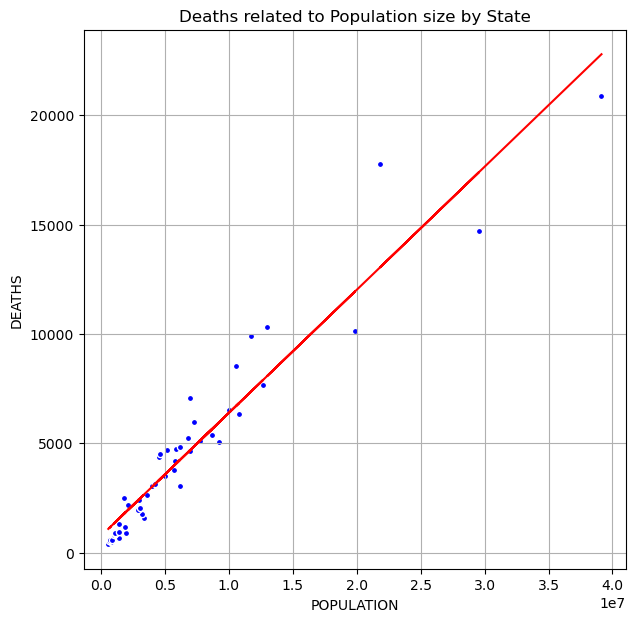

In [182]:
# use matplotlib to display a scatter plot of the columns POPULATION/1mil and DEATHS/1k
joined_df.plot(kind="scatter", y="DEATHS", x="POPULATION", grid=True, figsize=(7,7), marker="o", color="blue", edgecolors="white",
              title="Deaths related to Population size by State")
# add a linear regression line to the scatter plot
x_values = joined_df["POPULATION"]
y_values = joined_df["DEATHS"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")

# display the scatter plot
plt.show()

In [203]:
# top 5 states with least amount of deaths in 2021
least_deaths_df = joined_df.sort_values(by='DEATHS', ascending=True)

# display the first 5 rows of the sorted dataframe
print(least_deaths_df.head(10))

    YEAR STATE  DEATHS  POPULATION
49  2021    WY     381      579483
48  2021    ND     469      777934
47  2021    VT     536      646972
46  2021    AK     591      734182
45  2021    SD     596      896164
44  2021    HI     656     1447154
43  2021    DE     817     1004807
42  2021    RI     869     1096985
41  2021    MT     875     1106227
40  2021    NE     897     1963554


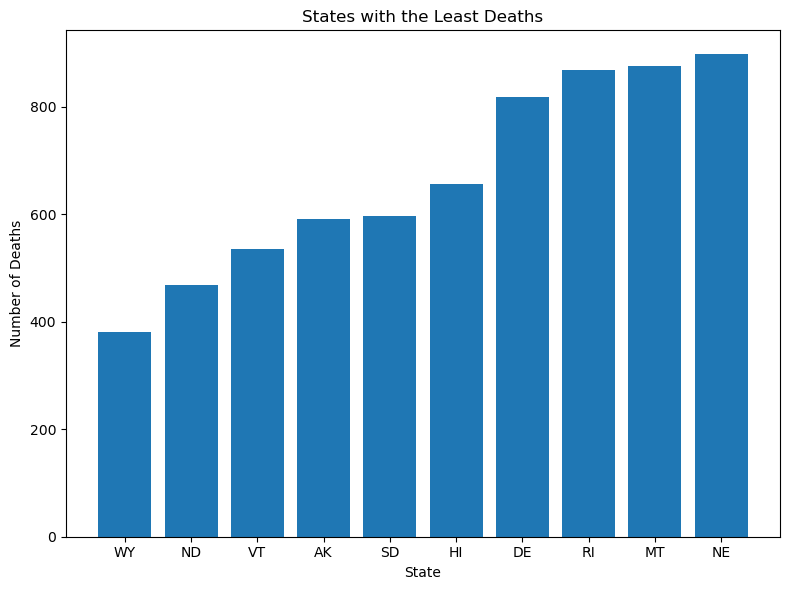

    YEAR STATE  DEATHS  POPULATION
49  2021    WY     381      579483
48  2021    ND     469      777934
47  2021    VT     536      646972
46  2021    AK     591      734182
45  2021    SD     596      896164
44  2021    HI     656     1447154
43  2021    DE     817     1004807
42  2021    RI     869     1096985
41  2021    MT     875     1106227
40  2021    NE     897     1963554


In [209]:
# Define the data as a dictionary
least_deaths_df = {
    'STATE': ['WY', 'ND', 'VT', 'AK', 'SD', 'HI', 'DE', 'RI', 'MT', 'NE'],
    'DEATHS': [381, 469, 536, 591, 596, 656, 817, 869, 875, 897],
}

# Convert the dictionary to a DataFrame
least_deaths_df = pd.DataFrame(least_deaths_df)

# Sort the DataFrame by 'DEATHS' in ascending order
least_deaths_df.sort_values(by='DEATHS', inplace=True)

# Get the first five rows of the DataFrame
first_five_rows = least_deaths_df.head(10)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(first_five_rows)), first_five_rows['DEATHS'])
plt.xticks(range(len(first_five_rows)), first_five_rows['STATE'])
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.title('States with the Least Deaths')
plt.tight_layout()
plt.show()

# top 5 states with least amount of deaths in 2021
least_deaths_df = joined_df.sort_values(by='DEATHS', ascending=True)

# display the first 5 rows of the sorted dataframe
print(least_deaths_df.head(10))

In [206]:
# top 5 states with most amount of deaths in 2021
joined_df = joined_df.sort_values(by='DEATHS', ascending=False)

# display the first 10 rows of the sorted dataframe
print(joined_df.head(10))


   YEAR STATE  DEATHS  POPULATION
0  2021    CA   20879    39142991
1  2021    FL   17780    21828069
2  2021    TX   14704    29558864
3  2021    PA   10327    13012059
4  2021    NY   10140    19857492
5  2021    OH    9919    11764342
6  2021    NC    8539    10565885
7  2021    IL    7664    12686469
8  2021    TN    7076     6968351
9  2021    MI    6541    10037504


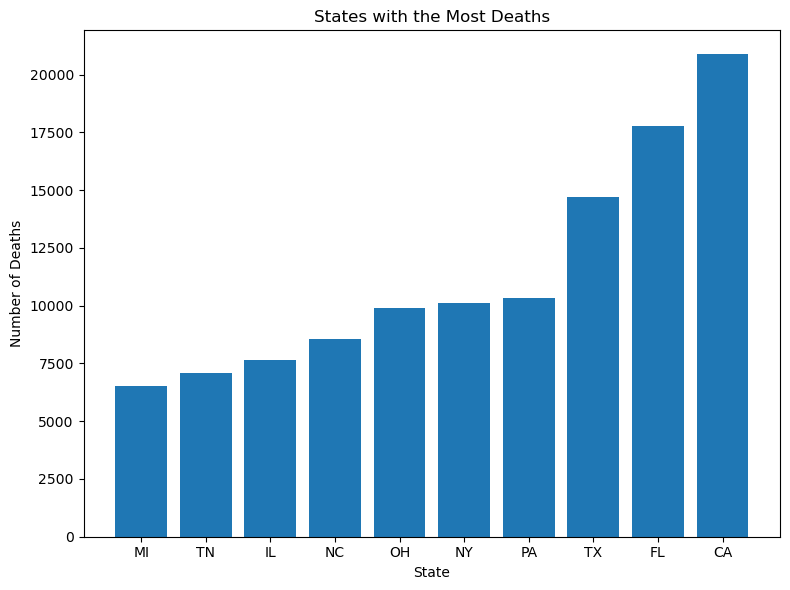

   YEAR STATE  DEATHS  POPULATION
0  2021    CA   20879    39142991
1  2021    FL   17780    21828069
2  2021    TX   14704    29558864
3  2021    PA   10327    13012059
4  2021    NY   10140    19857492
5  2021    OH    9919    11764342
6  2021    NC    8539    10565885
7  2021    IL    7664    12686469
8  2021    TN    7076     6968351
9  2021    MI    6541    10037504


In [213]:
# Define the data as a dictionary
most_deaths_df = {
    'STATE': ['MI', 'TN', 'IL', 'NC', 'OH', 'NY', 'PA', 'TX', 'FL', 'CA'],
    'DEATHS': [6541, 7076, 7664, 8539, 9919, 10140, 10327, 14704, 17780, 20879],
}

# Convert the dictionary to a DataFrame
most_deaths_df = pd.DataFrame(most_deaths_df)

# Sort the DataFrame by 'DEATHS' in ascending order
most_deaths_df.sort_values(by='DEATHS', inplace=True)

# Get the first five rows of the DataFrame
first_five_rows = most_deaths_df.head(10)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(first_five_rows)), first_five_rows['DEATHS'])
plt.xticks(range(len(first_five_rows)), first_five_rows['STATE'])
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.title('States with the Most Deaths')
plt.tight_layout()
plt.show()


# top 5 states with most amount of deaths in 2021
joined_df = joined_df.sort_values(by='DEATHS', ascending=False)

# display the first 10 rows of the sorted dataframe
print(joined_df.head(10))